In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("data_ffnn_3classes.txt",header = None,sep=" ")
V_neuron= 4
W_neuron = 3

Erro_History = []

In [87]:
# FRONT PROPAGATION
def YMatrix(data):
    Y = [[],[],[]]
    for y in data:
        if y == 0:
            Y[0].append(1)
            Y[1].append(0)
            Y[2].append(0)
        elif y == 1:
            Y[0].append(0)
            Y[1].append(1)
            Y[2].append(0)
        elif y == 2:
            Y[0].append(0)
            Y[1].append(0)
            Y[2].append(1)
    return np.array(Y).transpose()
            
def sigmoid(x):
    return 1/(1+np.exp(-x))

def X2Matrix(X):
    ones = np.ones(((np.size(X,0)),1))
    return np.append(ones,X,axis=1)

def X3Matrix(X,V):
    return X.dot(V)
    
def FMatrix(X):
    return sigmoid(X)

def F2Matrix(F):
    ones = np.ones((np.size(F,0),1))
    return np.append(ones,F,axis=1)

def F3Matrix(F,W):
    return F.dot(W)

def GMatrix(F):
    return sigmoid(F)

def Error(G,Y):
    err = (G - Y) ** 2
    return err.sum()/2

In [88]:
# BACK PROPAGATION
# Weight correction

def W_Correction(G,Y,F,W,a):
    W2 = np.zeros((np.size(W,0),np.size(W,1)))
    for k in range(np.size(W,0)):
        for j in range(np.size(W,1)):
            w = W[k][j]
            err = 0
            for i in range(np.size(G,1)):
                g = G[i][j]
                y = Y[i][j]
                f = F[i][k]
                
                err += (g-y) * g * (1-g) * f
            W2[k][j] = w - (a * err)
    return W2


def v_correction(g_mat, y_mat, f_mat, w_mat, x_mat_ext, v_mat, alpha):
    v_matrix_new = np.zeros((np.size(v_mat, 0),np.size(v_mat, 1)))
    for n in range(np.size(x_mat_ext, 1)):
        for k in range(np.size(v_mat, 1)):
            v = v_mat[n][k]
            err = 0
            for i in range(np.size(g_mat, 0)):
                f = f_mat[i][k]
                x_ext = x_mat_ext[i][n]
                for j in range(np.size(g_mat, 1)):
                    g = g_mat[i][j]
                    y = y_mat[i][j]
                    w = w_mat[k][j]
                    err += (g-y) * g * (-g) * w * f * (1-f) * x_ext
            v_matrix_new[n][k] = v - (alpha*err)
    return v_matrix_new

In [89]:
# FFNN
# Learning Loop

def FFNN(X2,Y,G,W,V,a,iter = 5000):
    new_v = V
    new_x2 = X2
    new_g = G
    new_w = W
    i=0
    while i <= iter:
        
        X3_Mat = X3Matrix(new_x2,new_v)
        
        new_f = FMatrix(X3_Mat)
        F2_Mat = F2Matrix(new_f)
        
        new_w = W_Correction(new_g,Y,F2_Mat,new_w,a)
        
        new_v = v_correction(new_g,Y,new_f,new_w,new_x2,new_v,a)
        
        F3_Mat = F3Matrix(F2_Mat,new_w)
        
        new_g = GMatrix(F3_Mat)
        
        err = Error(new_g,Y)
        Erro_History.append(err)
        
        i +=1
    return  new_g

In [90]:
def ShowErrorLog():
    plt.plot(Erro_History)
    plt.ylabel("Error")
    plt.xlabel("Itteration")
    plt.show()

         0       1    2
0   1.9643  4.5957  1.0
1   2.2753  3.8589  1.0
2   2.9781  4.5651  1.0
3   2.9320  3.5519  1.0
4   3.5772  2.8560  1.0
..     ...     ...  ...
66  4.7483  0.7251  2.0
67  4.2916  1.0857  2.0
68  4.7126  0.8640  2.0
69  4.1005  1.0058  2.0
70  3.9601  1.4057  2.0

[71 rows x 3 columns]


[[0.08002069 0.93863205 0.08338234]
 [0.08002553 0.93862897 0.08338576]
 [0.0800166  0.93863487 0.08337932]
 [0.08002165 0.93863173 0.08338291]
 [0.0800224  0.93863145 0.08338337]
 [0.08001761 0.93863434 0.08338001]
 [0.08001933 0.93863326 0.08338124]
 [0.08001588 0.93863534 0.08337879]
 [0.0800191  0.93863329 0.08338112]
 [0.08001755 0.93863424 0.08338002]
 [0.08001729 0.93863448 0.08337981]
 [0.08002538 0.93862948 0.0833855 ]
 [0.08002804 0.93862705 0.08338765]
 [0.0800202  0.93863246 0.08338196]
 [0.08002541 0.93862925 0.0833856 ]
 [0.08001676 0.93863478 0.08337944]
 [0.08001669 0.93863486 0.08337937]
 [0.08001718 0.93863458 0.08337972]
 [0.08001995 0.93863292 0.08338167]
 [0

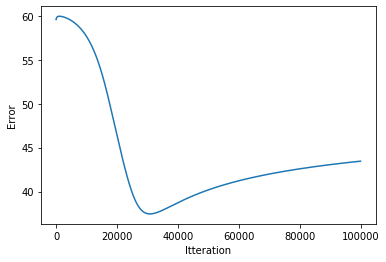

In [91]:
print(data)
print("\n")

Y_Matrix = YMatrix(data[2])
X_Matrix = np.array([data[0],data[1]]).transpose()
X2_Mat = X2Matrix(X_Matrix)

V_Mat = np.random.rand(np.size(X2_Mat,1),V_neuron)

X3_Mat = X3Matrix(X2_Mat,V_Mat)

F_Mat = FMatrix(X3_Mat)
F2_Mat = F2Matrix(F_Mat)

W_Mat = np.random.rand(V_neuron+1,W_neuron)

F3_Mat = F3Matrix(F2_Mat,W_Mat)

G_Mat = GMatrix(F3_Mat)

E_Mat = Error(G_Mat,Y_Matrix)

Erro_History.append(E_Mat)

Result = FFNN(X2_Mat,Y_Matrix,G_Mat,W_Mat,V_Mat,9e-5,iter = 1e5)
ShowErrorLog()
print(Result)